# CA02: This is a email Spam Classifers that uses Naive Bayes supervised machine learning algorithm.

Welcome to our spam classifer code using Naive Bayes ML!

First, we will import and load the packages.

In [144]:
import os
import numpy as np
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

Next, we must create our **make_dictionary** function

- This function takes a directory (root_dir) as input, reads all email files in that directory, collects all words from those emails, filters out non-alphabetic and single-character words, counts the occurrences of each remaining word, and finally returns a list of the 2000 most common words and their frequencies.

- We decided to reduce the number of words to 2000 from the original 3000 because we wanted reduced dimensionality and improved generalization. A smaller set of features can help in training the model more efficiently, especially when dealing with large datasets.

Lilly's code:

In [146]:
def make_Dictionary(root_dir):
  # Initializing an empty list to store all words from the emails
  all_words = []
  
  # Creating a list of file paths for all files in the specified directory
  email_files = [os.path.join(root_dir, f) for f in os.listdir(root_dir)]

  # Iterating through each email file
  for email_file in email_files:
    # Opening the email file
    with open(email_file) as email:
      # Extending the 'all_words' list with all words in the email
      all_words.extend(word for line in email for word in line.split())
      # The extend method simplifies the process of collecting all words in the email.
  
  # Counting the occurrences of each word in the 'all_words' list
  word_count = Counter(all_words)
  
  # Creating a list of unique words to be removed
  list_to_remove = list(word_count)

  # Iterating through the list of words to be removed
  for word in list_to_remove:
    # Removing non-alphabetic words
    if word.isalpha() == False:
      del word_count[word]
    # Removing single-character words
    elif len(word) == 1:
      del word_count[word]

  # Selecting the 2000 most common words and their frequencies
  word_count = word_count.most_common(2000)
  
  # Returning the list of 2000 most common words and their frequencies
  return word_count

Then, we will create our **extract_features** function

- This function takes a directory as input, reads each email file in the directory, extracts features from the 3rd line of each email, updates a features matrix based on the occurrences of words the dictionary, and assigns labels (spam or not spam) to each document. The function then returns the features matrix and corresponding labels.


- We decided to use os.path.sep for file path splitting, enhancing the use of OS compatibility whether you're using a Windows or OS operating system.

Ella's code:

In [147]:
def extract_features(directory):
  # Creating a list of file paths for all files in the specified directory
  files = [os.path.join(directory, fi) for fi in os.listdir(directory)]

  # Creating a matrix to store features, initialized with zeros
  features_matrix = np.zeros((len(files), 2000))

  # Creating an array to store labels (0 for not spam, 1 for spam)
  train_labels = np.zeros(len(files))

  # Initializing counters for loop iteration
  count = 1
  docID = 0

  # Iterating through each file in the directory
  for file_path in files:
    # Opening the email file
    with open(file_path) as email_file:
      # Iterating through each line in the email file
      for i, line in enumerate(email_file):
        # Checking if the line is the third line in the email file
        if i == 2:
          # Splitting the line into words
          words = line.split()
          # Iterating through each word in the line
          for word in words:
            # Initializing the wordID to 0
            wordID = 0
            # Iterating through the dictionary to find the word
            for i, d in enumerate(dictionary):
              if d[0] == word:
                # Updating the wordID if the word is found in the dictionary
                wordID = i
                # Updating the features_matrix with the count of the word
                features_matrix[docID, wordID] = words.count(word)

      # Setting the label for the current document to 0 (not spam)
      train_labels[docID] = 0

      # Extracting the last token from the file path
      filepathTokens = file_path.split(os.path.sep)
      lastToken = filepathTokens[len(filepathTokens) - 1]

      # Printing the file path and its classification (spam or not spam) to ensure it's running properly
      print(f"{file_path}: {'Spam' if lastToken.startswith('spmsg') else 'Not Spam'}")

      # Updating the label to 1 (spam) if the file is classified as spam
      if lastToken.startswith("spmsg"):
        train_labels[docID] = 1
        count += 1

      # Incrementing the document ID
      docID += 1

  # Returning the features matrix and train labels
  return features_matrix, train_labels

Now, we will pull our two data folders. Make sure that your train-mails and test-mails folders are in the same folder as your working directory for this code.

In [148]:
# Enter the "path" of your "train_mails" and "test-mails" FOLDERS in this cell ...
TRAIN_DIR = './train-mails'
TEST_DIR = './test-mails'

Next, we will call on the extract_features function twice, once for the training directory **(TRAIN_DIR)** and once for the testing directory **(TEST_DIR)**. The extracted features and labels are stored in the variables features_matrix, labels for the **TRAIN_DIR** and stored in the test_features_matrix, and test_labels for the **TEST_DIR**.

In [149]:
# Creating a dictionary using the make_Dictionary function on the TRAIN_DIR
dictionary = make_Dictionary(TRAIN_DIR)

# Printing the start of reading and processing emails
print("reading and processing emails from TRAIN and TEST folders")

# Extracting features and labels from the training directory
features_matrix, labels = extract_features(TRAIN_DIR)

# Extracting features and labels from the testing directory
test_features_matrix, test_labels = extract_features(TEST_DIR)


reading and processing emails from TRAIN and TEST folders
./train-mails/6-338msg1.txt: Not Spam
./train-mails/5-1300msg3.txt: Not Spam
./train-mails/6-250msg1.txt: Not Spam
./train-mails/6-266msg3.txt: Not Spam
./train-mails/spmsgc10.txt: Spam
./train-mails/5-1326msg1.txt: Not Spam
./train-mails/spmsga114.txt: Spam
./train-mails/spmsga100.txt: Spam
./train-mails/6-110msg3.txt: Not Spam
./train-mails/6-126msg1.txt: Not Spam
./train-mails/spmsga128.txt: Spam
./train-mails/6-806msg1.txt: Not Spam
./train-mails/spmsga12.txt: Spam
./train-mails/6-816msg1.txt: Not Spam
./train-mails/6-381msg1.txt: Not Spam
./train-mails/spmsgb145.txt: Spam
./train-mails/spmsgb151.txt: Spam
./train-mails/spmsgb58.txt: Spam
./train-mails/8-835msg1.txt: Not Spam
./train-mails/3-390msg1.txt: Not Spam
./train-mails/spmsgb64.txt: Spam
./train-mails/3-380msg1.txt: Not Spam
./train-mails/spmsgb70.txt: Spam
./train-mails/spmsgb71.txt: Spam
./train-mails/spmsgb65.txt: Spam
./train-mails/3-390msg0.txt: Not Spam
./train

Now, we will create a Gaussian Naive Bayes classifier **(gnb)**, train it using the features and labels from the training set. The trained model is used to make predictions on the test set **(test_features_matrix)**, and the predicted labels are printed with a corresponding message.

In [150]:
# Create Gaussian Naive Bayes classifier
gnb = GaussianNB()
print ("Training Model using Guassian Naive Bayes algorithm")

Training Model using Guassian Naive Bayes algorithm


In [151]:
# Train the classifier using the features and labels from the training set
gnb.fit(features_matrix, labels)
print ("Training completed")

Training completed


In [152]:
# Once we trained the data, we used the model to make predictions on the test set
predictions = gnb.predict(test_features_matrix)
print ("testing trained model to predict Test Data labels")
predictions

testing trained model to predict Test Data labels


array([1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 1.

We did it! Now let's check the accuracy to see how we did. Accuracy is important for Naive Bayes models as it provides a straightforward measure of overall predictive performance, representing the ratio of correctly predicted instances to the total instances. 

In [153]:
print ("Completed classification of the Test Data .... now printing Accuracy Score by comparing the Predicted Lables with the Test Lables:")
#Here we evaluating the performance of the model using the metric method accuracy provided by sklearn.metrics module

#Calculating accuracy:
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy)

Completed classification of the Test Data .... now printing Accuracy Score by comparing the Predicted Lables with the Test Lables:
Accuracy: 0.9730769230769231


97.30% accuracy is great! Now, let's take a look at the confusion matrix.

A confusion matrix for Naive Bayes is a table that summarizes the performance of a classification model by displaying the counts of true positive, true negative, false positive, and false negative predictions. 

Inbar's code:

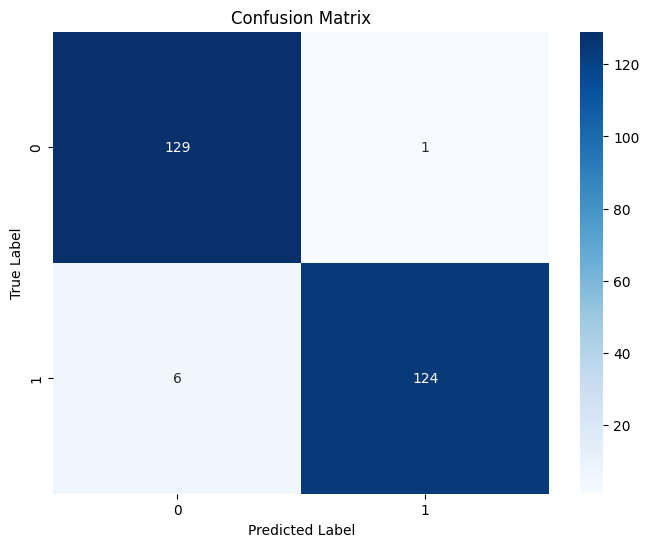

In [154]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

There are 130 true spam emails and 130 true non-spam emails.
Out of all emails, 135 were predicted as non-spam and 125 were predicted as spam.
Specifically, 124 spam emails were correctly predicted as spam, and 129 non-spam emails were correctly predicted as non-spam.


Finally, let's create a wordcloud to take a look at which words were most popular in the spam emails.

Inbar's Code:

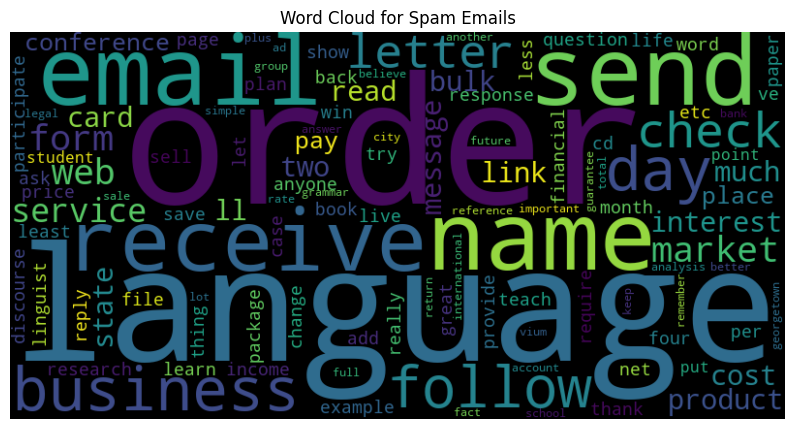

In [155]:
from wordcloud import WordCloud

# Extract only the words from the dictionary
words = [word for word, _ in dictionary]

# Create word cloud for spam emails
spam_words = ' '.join([word for word, label in zip(words, predictions) if label == 1])
spam_wordcloud = WordCloud(width=800, height=400).generate(spam_words)

# Plot word cloud for spam emails
plt.figure(figsize=(10, 6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Emails')
plt.show()

======================= END OF PROGRAM =========================